In [21]:
#Q1# Import necessary libraries
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
file_path = 'movieReplicationSet.csv'
data = pd.read_csv(file_path)

# Step 1: Calculate the number of ratings (popularity) for each movie (columns 1 to 400)
movie_columns = data.columns[:400]
popularity_counts = data[movie_columns].notna().sum()

# Step 2: Determine the median of the popularity counts
median_popularity = popularity_counts.median()

# Step 3: Divide movies into high and low popularity based on the median
high_popularity_movies = popularity_counts[popularity_counts > median_popularity].index
low_popularity_movies = popularity_counts[popularity_counts <= median_popularity].index

# Step 4: Calculate the mean rating for each movie in high and low popularity groups
high_popularity_means = data[high_popularity_movies].mean()
low_popularity_means = data[low_popularity_movies].mean()

# Step 5: Perform the Mann-Whitney U Test on the mean ratings
u_statistic, p_value = mannwhitneyu(high_popularity_means, low_popularity_means, alternative='two-sided')

# Display the results
print("Mann-Whitney U Test Statistic:", u_statistic)
print("p-value:", p_value)


Mann-Whitney U Test Statistic: 35404.0
p-value: 1.6971433120157929e-40


Overall Mean Rating for High Popularity Movies: 2.8683159282110724
Overall Mean Rating for Low Popularity Movies: 2.400922845130662


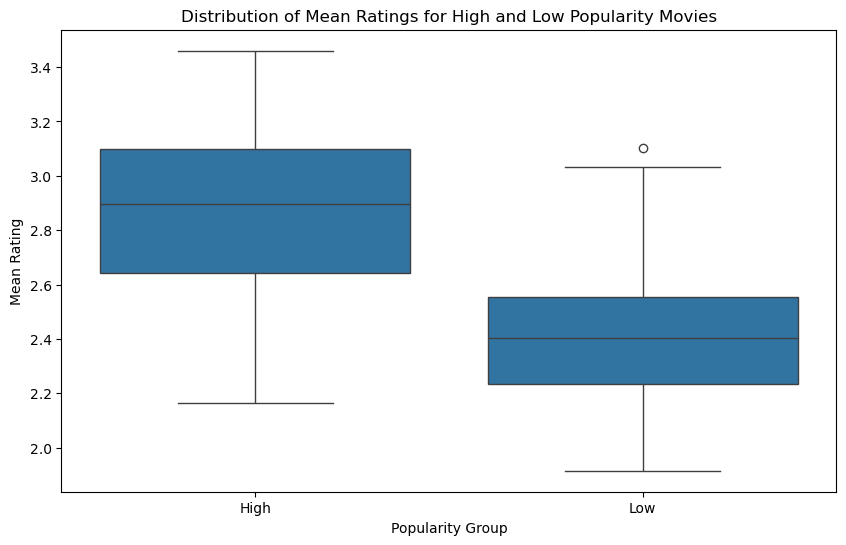

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the overall mean rating for high and low popularity groups
overall_high_popularity_mean = high_popularity_means.mean()
overall_low_popularity_mean = low_popularity_means.mean()

print("Overall Mean Rating for High Popularity Movies:", overall_high_popularity_mean)
print("Overall Mean Rating for Low Popularity Movies:", overall_low_popularity_mean)

# Step 2: Visualize the distributions of mean ratings for high and low popularity movies
# Prepare data for visualization
popularity_data = pd.DataFrame({
    "Mean Rating": pd.concat([high_popularity_means, low_popularity_means]),
    "Popularity Group": ["High"] * len(high_popularity_means) + ["Low"] * len(low_popularity_means)
})

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Popularity Group", y="Mean Rating", data=popularity_data)
plt.title("Distribution of Mean Ratings for High and Low Popularity Movies")
plt.ylabel("Mean Rating")
plt.xlabel("Popularity Group")
plt.show()


In [23]:
#Question7 final 
# Step 1: Data Cleaning for Question 7
import pandas as pd

# Load the dataset
file_path = 'movieReplicationSet.csv'
data = pd.read_csv(file_path)

# Define columns for "The Wolf of Wall Street (2013)" and "Movies are best enjoyed alone" preference
wolf_wall_street_column = 'The Wolf of Wall Street (2013)'
social_watching_column = 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'

# Filter data for relevant columns and exclude entries marked as "no response" (-1) in the social watching column
cleaned_q7_data = data[[wolf_wall_street_column, social_watching_column]].dropna()
cleaned_q7_data = cleaned_q7_data[cleaned_q7_data[social_watching_column].isin([0, 1])]

# Display the cleaned dataset for Question 7
cleaned_q7_data.head(), cleaned_q7_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 3 to 1096
Data columns (total 2 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   The Wolf of Wall Street (2013)                                      663 non-null    float64
 1   Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)  663 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 15.5 KB


(   The Wolf of Wall Street (2013)  \
 3                             4.0   
 4                             3.0   
 5                             2.5   
 6                             1.0   
 7                             3.5   
 
    Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)  
 3                                                  1                   
 4                                                  1                   
 5                                                  0                   
 6                                                  0                   
 7                                                  1                   ,
 None)

Mann-Whitney U Test Statistic: 49303.5
p-value: 0.1127642933222891


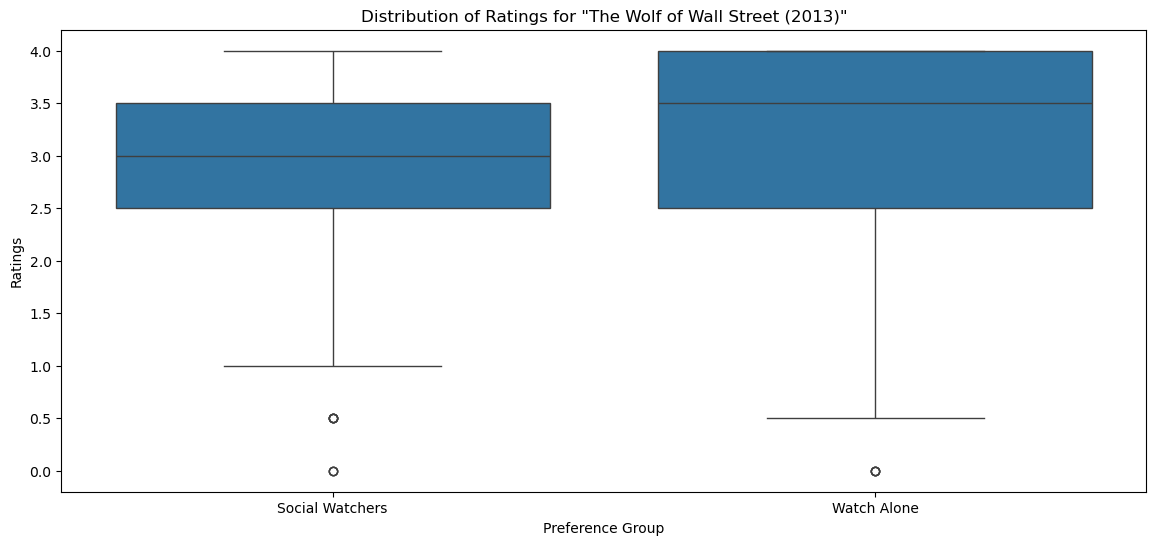

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Step 1: Filter ratings for social watchers (0) and those who prefer watching alone (1)
social_watch_ratings = cleaned_q7_data[cleaned_q7_data[social_watching_column] == 0][wolf_wall_street_column]
alone_watch_ratings = cleaned_q7_data[cleaned_q7_data[social_watching_column] == 1][wolf_wall_street_column]

# Step 2: Perform the Mann-Whitney U Test
u_statistic_q7, p_value_q7 = mannwhitneyu(social_watch_ratings, alone_watch_ratings, alternative='two-sided')

# Display the U statistic and p-value
print("Mann-Whitney U Test Statistic:", u_statistic_q7)
print("p-value:", p_value_q7)

# Step 3: Visualization of the distribution of ratings
plt.figure(figsize=(14, 6))

# Prepare data for visualization
popularity_data = pd.DataFrame({
    'Mean Rating': pd.concat([social_watch_ratings, alone_watch_ratings]),
    'Preference Group': ['Social Watchers'] * len(social_watch_ratings) + ['Watch Alone'] * len(alone_watch_ratings)
})

# Boxplot of ratings for social watchers and those who watch alone
sns.boxplot(x='Preference Group', y='Mean Rating', data=popularity_data)
plt.ylabel('Ratings')
plt.title('Distribution of Ratings for "The Wolf of Wall Street (2013)"')
plt.show()


In [25]:
# Step 1: Data Cleaning for Question 8
# Define the column for "Movies are best enjoyed alone" preference
social_watching_column = 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'

# Filter data for valid social watching responses
filtered_data_q8 = data[data[social_watching_column].isin([0, 1])]

# Initialize a list to keep track of movies with a significant social watching effect
significant_social_watching_movies = []

filtered_data_q8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1096
Columns: 477 entries, The Life of David Gale (2003) to Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
dtypes: float64(475), int64(2)
memory usage: 3.9 MB


Number of Movies with Significant Social Watching Effect: 10
Proportion of Significant Movies: 0.025


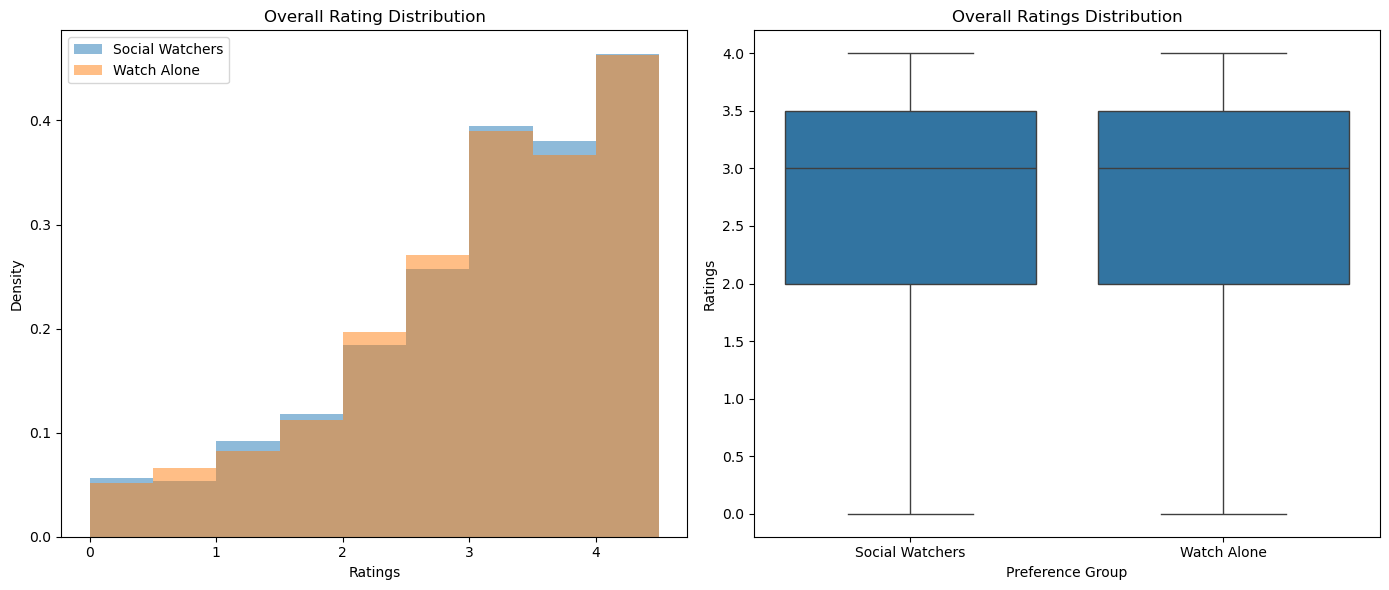

In [26]:
# Cell 2: Mann-Whitney U Test and Overall Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Initialize a list to keep track of movies with a significant social watching effect
significant_social_watching_movies = []

# Get the list of movie columns (assuming the first 400 columns are ratings)
movie_columns = data.columns[:400]

# Prepare to collect ratings for social watchers and those who watch alone
all_social_watch_ratings = []
all_alone_watch_ratings = []

# Step 2: Perform Mann-Whitney U Test on each movie column
for movie in movie_columns:
    # Drop rows with NaN values specifically for movie to ensure complete data for comparison
    movie_data = filtered_data_q8[[movie, social_watching_column]].dropna()
    
    # Separate ratings by social watching preference
    social_watch_ratings = movie_data[movie_data[social_watching_column] == 0][movie]
    alone_watch_ratings = movie_data[movie_data[social_watching_column] == 1][movie]
    
    # Add ratings to overall lists
    all_social_watch_ratings.extend(social_watch_ratings)
    all_alone_watch_ratings.extend(alone_watch_ratings)
    
    # Perform Mann-Whitney U Test if both groups have sufficient ratings
    if len(social_watch_ratings) > 0 and len(alone_watch_ratings) > 0:
        u_statistic, p_value = mannwhitneyu(social_watch_ratings, alone_watch_ratings, alternative='two-sided')
        
        # Check if p-value indicates a significant difference
        if p_value < 0.005:
            significant_social_watching_movies.append(movie)

# Output the results
number_of_significant_movies = len(significant_social_watching_movies)
proportion_significant_movies = number_of_significant_movies / len(movie_columns) if len(movie_columns) > 0 else 0

# Display the results
print("Number of Movies with Significant Social Watching Effect:", number_of_significant_movies)
print("Proportion of Significant Movies:", proportion_significant_movies)

# Step 3: Overall Visualization of Ratings for Both Groups
plt.figure(figsize=(14, 6))

# Histogram of ratings distribution for social watchers and those who watch alone
plt.subplot(1, 2, 1)
plt.hist(all_social_watch_ratings, bins=np.arange(0, 5, 0.5), alpha=0.5, label='Social Watchers', density=True)
plt.hist(all_alone_watch_ratings, bins=np.arange(0, 5, 0.5), alpha=0.5, label='Watch Alone', density=True)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Overall Rating Distribution')
plt.legend()

# Boxplot of ratings for social watchers and those who watch alone
plt.subplot(1, 2, 2)
overall_data = pd.DataFrame({
    'Ratings': all_social_watch_ratings + all_alone_watch_ratings,
    'Preference Group': ['Social Watchers'] * len(all_social_watch_ratings) + ['Watch Alone'] * len(all_alone_watch_ratings)
})
sns.boxplot(x='Preference Group', y='Ratings', data=overall_data)
plt.title('Overall Ratings Distribution')
plt.ylabel('Ratings')
plt.xlabel('Preference Group')

plt.tight_layout()
plt.show()


In [27]:

#Q10 final
# Define the franchises and their corresponding movie keywords
franchises = {
    'Star Wars': ['Star Wars'],
    'Harry Potter': ['Harry Potter'],
    'The Matrix': ['Matrix'],
    'Indiana Jones': ['Indiana Jones'],
    'Jurassic Park': ['Jurassic Park'],
    'Pirates of the Caribbean': ['Pirates of the Caribbean'],
    'Toy Story': ['Toy Story'],
    'Batman': ['Batman']
}

# Extract movie titles that belong to these franchises
franchise_movies = {franchise: [] for franchise in franchises.keys()}

# Iterate through the columns to find movies matching the keywords
for column in data.columns:
    for franchise, keywords in franchises.items():
        if any(keyword in column for keyword in keywords):
            franchise_movies[franchise].append(column)

franchise_movies


{'Star Wars': ['Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode II - Attack of the Clones (2002)',
  'Star Wars: Episode V - The Empire Strikes Back (1980)',
  'Star Wars: Episode 1 - The Phantom Menace (1999)',
  'Star Wars: Episode VII - The Force Awakens (2015)',
  'Star Wars: Episode VI - The Return of the Jedi (1983)'],
 'Harry Potter': ["Harry Potter and the Sorcerer's Stone (2001)",
  'Harry Potter and the Deathly Hallows: Part 2 (2011)',
  'Harry Potter and the Goblet of Fire (2005)',
  'Harry Potter and the Chamber of Secrets (2002)'],
 'The Matrix': ['The Matrix Revolutions (2003)',
  'The Matrix Reloaded (2003)',
  'The Matrix (1999)'],
 'Indiana Jones': ['Indiana Jones and the Last Crusade (1989)',
  'Indiana Jones and the Temple of Doom (1984)',
  'Indiana Jones and the Raiders of the Lost Ark (1981)',
  'Indiana Jones and the Kingdom of the Crystal Skull (2008)'],
 'Jurassic Park': ['The Lost World: Jurassic Park (1997)',
  'Jurassic Park III (2001)',
  

In [28]:
# Prepare separate lists for ratings and franchise labels
rating_values = []
franchise_labels = []

for franchise, movies in franchise_movies.items():
    for movie in movies:
        # Collect the ratings for the current movie and filter out NaN values
        ratings = data[movie].dropna().values
        rating_values.extend(ratings)  # Extend the rating list
        franchise_labels.extend([franchise] * len(ratings))  # Add franchise labels for each rating

# Create the DataFrame with proper structure
ratings_df = pd.DataFrame({
    'Rating': rating_values,
    'Franchise': franchise_labels
})

# Display the cleaned DataFrame
ratings_df.head()


,Rating,Franchise
0,4.0,Star Wars
1,4.0,Star Wars
2,3.0,Star Wars
3,4.0,Star Wars
4,4.0,Star Wars


In [29]:
from scipy.stats import kruskal

# Group ratings by franchise for the Kruskal-Wallis test
grouped_ratings = [ratings_df[ratings_df['Franchise'] == franchise]['Rating'] for franchise in franchises.keys()]

# Perform the Kruskal-Wallis test
kruskal_statistic, p_value = kruskal(*grouped_ratings)

kruskal_statistic, p_value


(965.5583484334335, 3.3244044524999145e-204)

C:\Users\91838\AppData\Local\Temp\ipykernel_25008\2907229952.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Franchise', y='Rating', data=ratings_df, palette='Set2')


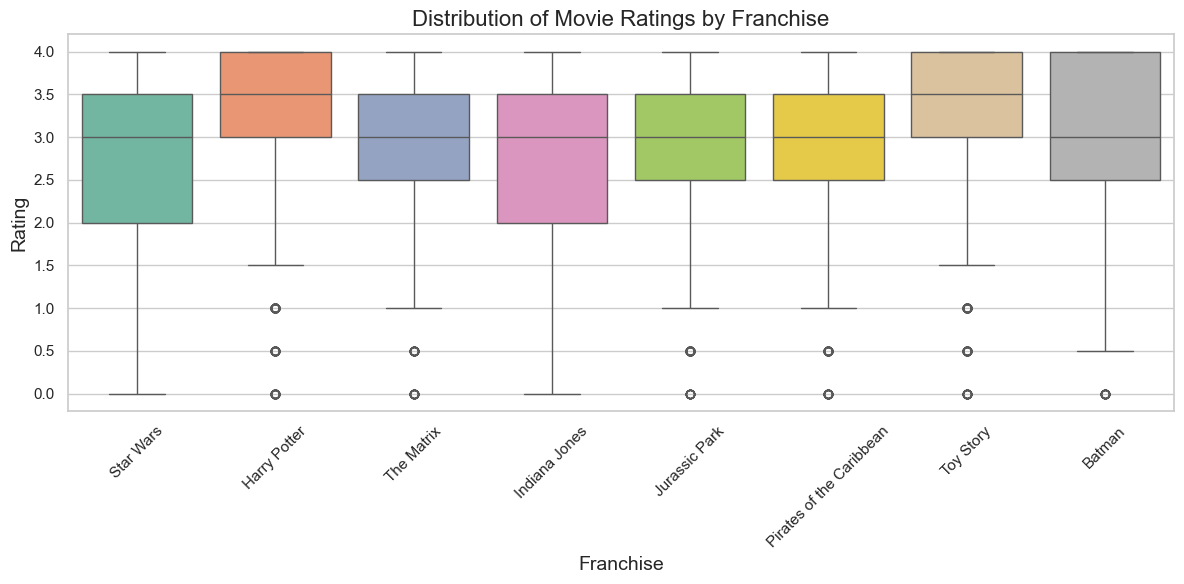

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution of ratings for each franchise
plt.figure(figsize=(12, 6))
sns.boxplot(x='Franchise', y='Rating', data=ratings_df, palette='Set2')
plt.title('Distribution of Movie Ratings by Franchise', fontsize=16)
plt.xlabel('Franchise', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
